<a href="https://colab.research.google.com/github/Abhishek-Shubham001/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Capstone_Project_on_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

-----------------------------------------------------------------------------
##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**
-----------------------------------------------------------------------------

#**Introduction**

##**What is a Stock?**


### A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.





---


###The dataset of YES BANK has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month of around 180 observations. It contains the following features:

### 1. **Date**: It denotes date of investment done (in our case we have month and year).

### 2. **Open**: The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

### 3. **High**: The high is the highest price at which a stock traded during a period.

### 4. **Low**: The low is the lowest price at which a stock traded during a period.

### 5. **Close**: Close refers to the price of an individual stock when the stock exchange closed for the day.


---


##Importing and Loading data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing 'Yest Bank' Data Set

stock_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Yes Bank Stock Closing Price Prediction- Abhishek Shubham/data_YesBank_StockPrices.csv')

## Exploring Data Frame

In [3]:
#Checking the top 5 observations
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
#Checking botton 5 observations
stock_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [5]:
#Exploring the data types and 
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Findings:**

- There are total 185 records/ rows and 5 columns
- Most columns are of type float and only "Date" Column is of type object.
- We would need to conver the Date column from object to date type.


In [6]:
# Let's check the summary of numerical features
stock_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
#Shape of DF
stock_df.shape

(185, 5)

In [8]:
#Checking for null values
stock_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Luckily there is no null values in our Df. This save's time and efforts to deal with null values seperately!


In [9]:
#Checking for Duplication in our Dataset
len(stock_df[stock_df.duplicated()])


0

In [10]:
#Convertting Date column from object to date type(Data wrangling)
stock_df['Date']= pd.to_datetime(stock_df['Date'], format= '%b-%y')

In [11]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


#**Exploratory Data Analysis**

##**Univariate Analysis**

<Figure size 576x360 with 0 Axes>

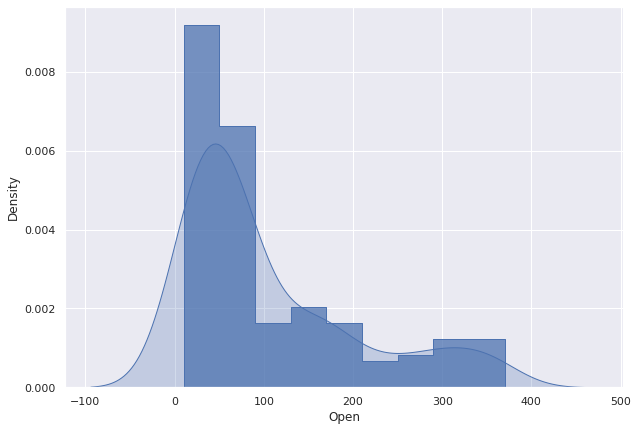

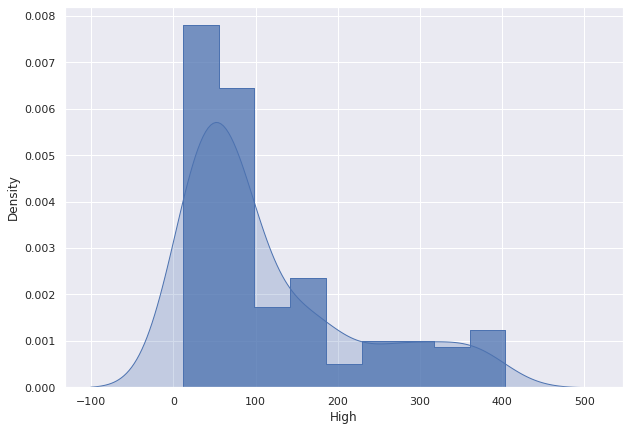

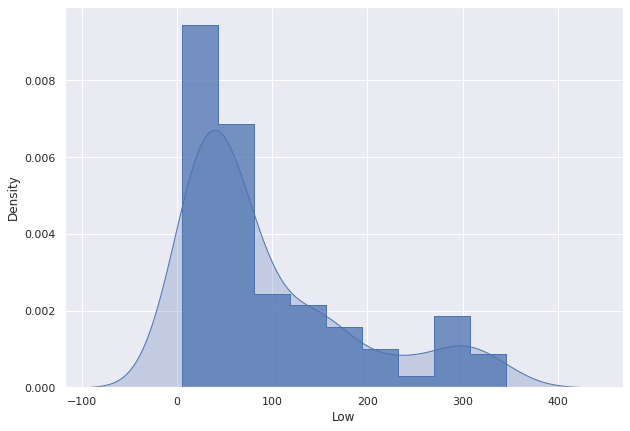

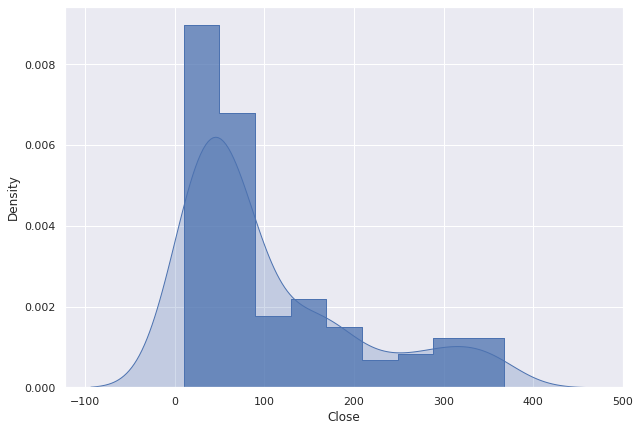

In [12]:
# Plotting Distributions of all the numerical variables
plt.figure(figsize= [8, 5])
features= list(stock_df.describe().columns)
sns.set(style='darkgrid')
for col in features:
  fig, ax = plt.subplots()
  sns.histplot(stock_df[col], ax= ax, stat= 'density', element= 'step'  )
  sns.kdeplot(stock_df[col], fill= True)
  fig.set_figheight(7)
  fig.set_figwidth(10)

**Findings:**

- All the features are skewed towards right.
- In this case we would need to convert it into normal distribution to get a better accuracy from our model. 

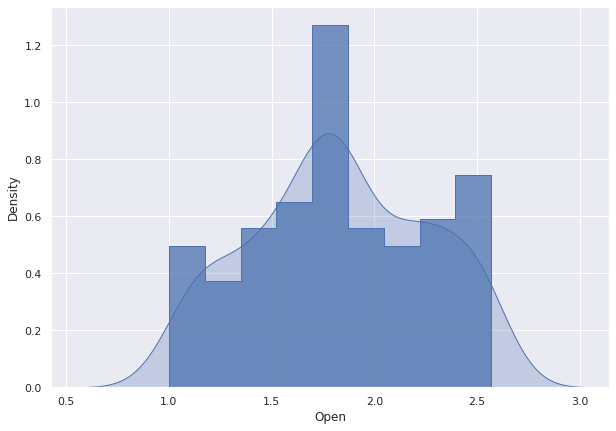

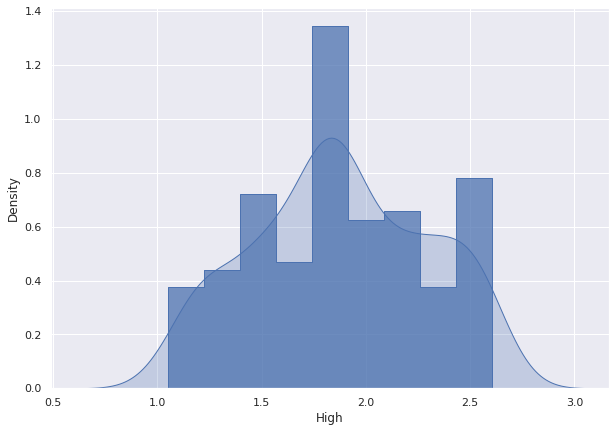

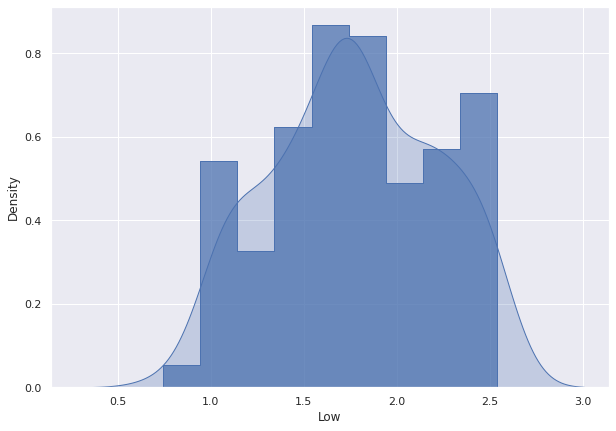

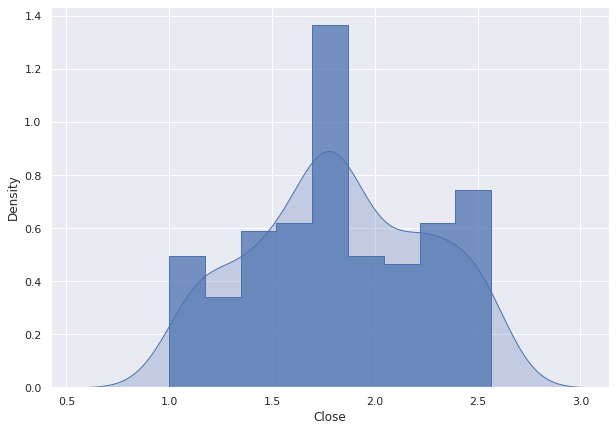

In [13]:
#Log transformation of all numerial features 
features= list(stock_df.describe().columns)
sns.set(style='darkgrid')
for col in features:
  fig, ax = plt.subplots()
  sns.histplot(np.log10(stock_df[col]), ax= ax, stat= 'density', element= 'step'  )
  sns.kdeplot(np.log10(stock_df[col]), fill= True)
  fig.set_figheight(7)
  fig.set_figwidth(10)

**Findings:**
- After the log transformation the distribution of our Data Set turned into symmetrical.

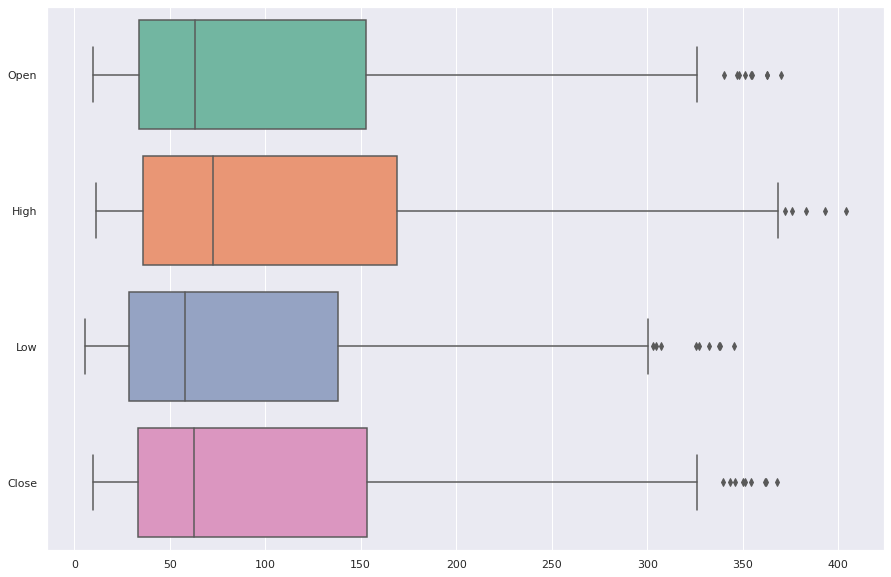

In [14]:
#Boxplot comparision of all the numerical features
plt.figure(figsize= (15, 10))
sns.boxplot(data=stock_df, orient="h", palette="Set2")

**Findings**:
- All the features has median values between Rs 50 to Rs 80
- There is a presence of outliers in all the features variables
- Feature "High" has median value which is Rs 72.55 

##**Multivariate Analysis**

In [15]:
stock_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [16]:
Yearly_df= stock_df.groupby('Date')['Close'].mean().reset_index()
Yearly_df

,Date,Close
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41
...,...,...
180,2020-07-01,11.95
181,2020-08-01,14.37
182,2020-09-01,13.15
183,2020-10-01,12.42


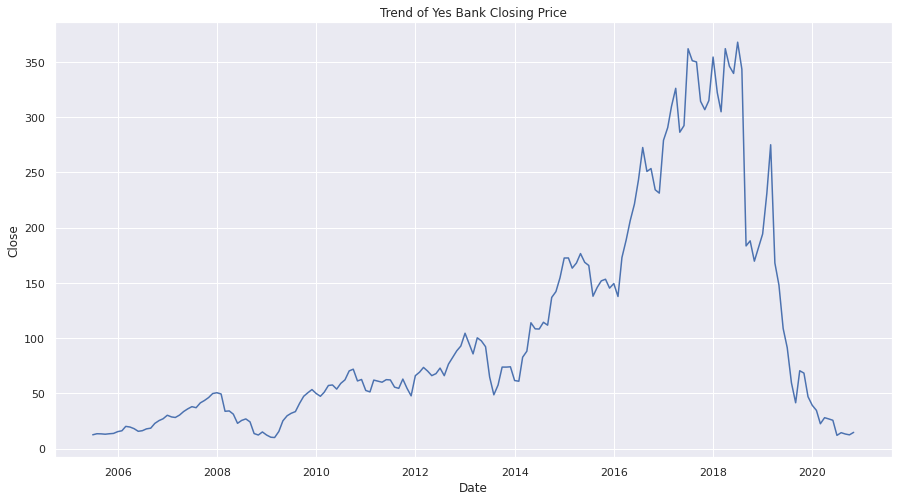

In [17]:
plt.figure(figsize= [15, 8])
plt.title("Trend of Yes Bank Closing Price")
sns.lineplot(data=Yearly_df, x= 'Date', y= 'Close', palette= 'husl' )

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.



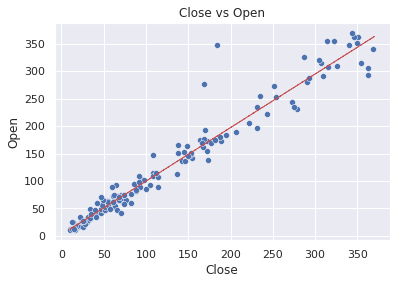

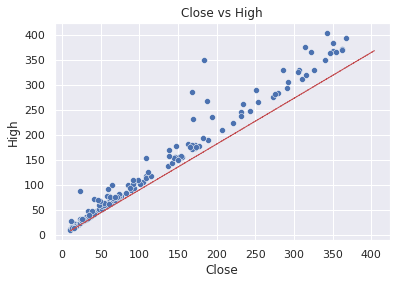

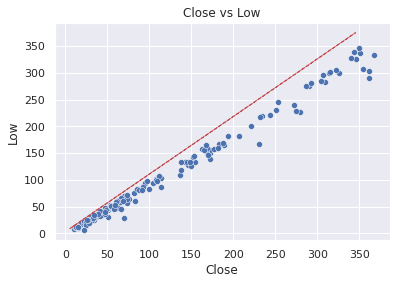

In [18]:
#Now let's check the relationship of each features with our dependent variable
Independent_variables= list(stock_df.drop('Close', axis= 1).describe().columns)
for col in Independent_variables:
  fig, ax = plt.subplots()
  sns.scatterplot(data= stock_df, x= 'Close', y= col, ax= ax)
  ax.set_title(f'Close vs {col}')
  z = np.polyfit(stock_df[col], stock_df['Close'], 1)
  y_hat = np.poly1d(z)(stock_df[col])
 
  ax.plot(stock_df[col], y_hat, "r--", lw=1)

**Findings:**

- All independent features have linear relationship with the dependent variable.

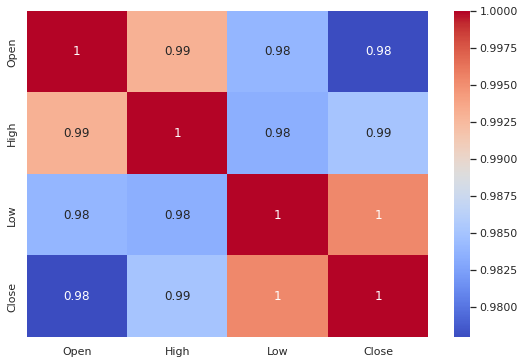

In [19]:
#Let's get the heatmmap of the Numerical Variables
plt.figure(figsize= (9, 6))
Coorelation_matrix= stock_df.corr()
sns.heatmap(Coorelation_matrix, annot= True, cmap= 'coolwarm')

**Findings:**

- Looking at the heatmap we can say that all the features are highly coorelated. 
- Feature 'Low' has highest coorelation of 1 with dependent variable.
- There exists multicoolinearity between Independent variables which means that we would need to remove one or more features from our dataset during feature selection. 
- Problem due to Multicollinearity is that it generates high variance of the estimated coefficients and hence, the coefficient estimates corresponding to those interrelated explanatory variables will not be accurate in giving us the actual picture. They can become very sensitive to small changes in the model.